In [26]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data 

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
import seaborn as sns 

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [27]:
#loading the MNIST Dataset 

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [28]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization and Preprocessing

In [29]:
#reshaping train and test sets 

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))

test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [30]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

 

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [31]:
#normalizing the pixel values of images 

train_x = train_x.astype('float32')/255.0

test_x = test_x.astype('float32')/255.0

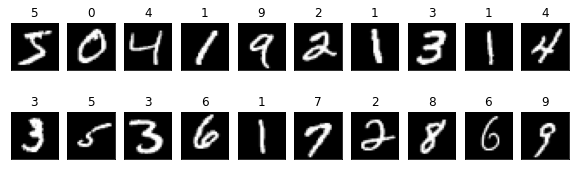

In [32]:
#plotting images of dataset 

fig = plt.figure(figsize = (10,3))

for i in range(20):

    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(train_x[i]), cmap='gray')

    ax.set_title(train_y[i])

In [33]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

In [34]:
#CNN Model 

model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [36]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 41s - loss: 0.2508 - accuracy: 0.9226 - val_loss: 0.0638 - val_accuracy: 0.9828 - 41s/epoch - 97ms/step
Epoch 2/10
422/422 - 54s - loss: 0.0835 - accuracy: 0.9735 - val_loss: 0.0412 - val_accuracy: 0.9900 - 54s/epoch - 127ms/step
Epoch 3/10
422/422 - 56s - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0382 - val_accuracy: 0.9903 - 56s/epoch - 132ms/step
Epoch 4/10
422/422 - 56s - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.0322 - val_accuracy: 0.9902 - 56s/epoch - 132ms/step
Epoch 5/10
422/422 - 50s - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0315 - val_accuracy: 0.9908 - 50s/epoch - 118ms/step
Epoch 6/10
422/422 - 52s - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9928 - 52s/epoch - 122ms/step
Epoch 7/10
422/422 - 54s - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0279 - val_accuracy: 0.9923 - 54s/epoch - 129ms/step
Epoch 8/10
422/422 - 52s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0286 - val_accuracy: 0.9915 - 52s/epoch - 124m

# EarlyStopping

In [37]:
from keras.callbacks import EarlyStopping
callsbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]
model2.fit(X_train,y_train,epochs=5,batch_size=2,validation_split=0)

NameError: name 'model2' is not defined

# confusion matrix

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
y_pred = model.predict(test_x)

313/313 [==============================] - 3s 8ms/step


In [40]:
from sklearn.metrics import confusion_matrix


confusion=confusion_matrix(test_y, np.argmax(y_pred,axis=1))


In [41]:
print(confusion)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    0    2    0    0    1    0    0    0]
 [   0    0 1024    1    1    0    0    5    1    0]
 [   0    0    1 1007    0    1    0    1    0    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    1    7    0  880    1    1    0    1]
 [   5    2    0    0    1    3  947    0    0    0]
 [   0    2    2    0    0    0    0 1021    1    2]
 [   1    0    3    2    0    0    0    1  965    2]
 [   0    1    0    1    4    2    0    2    0  999]]


<AxesSubplot:>

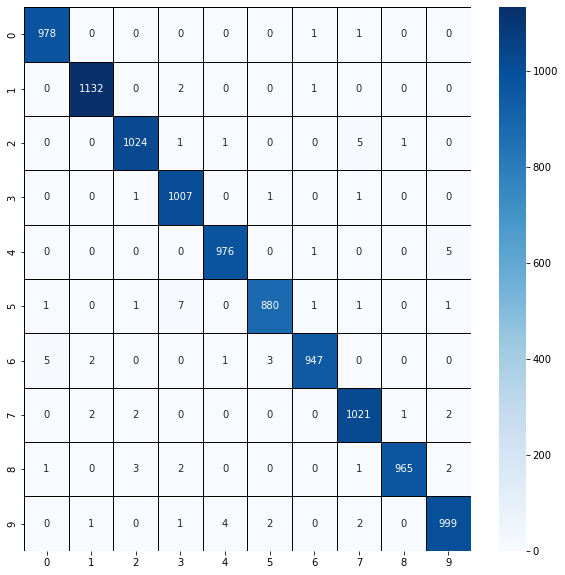

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [43]:
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 99.2900013923645


# classification report 

In [44]:
c =classification_report(test_y, np.argmax(y_pred,axis=1))

In [45]:
print(c)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
#norlmal
def plot_metric(x, metric):
    train_metrics = x.history[metric]
    val_metrics = x.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

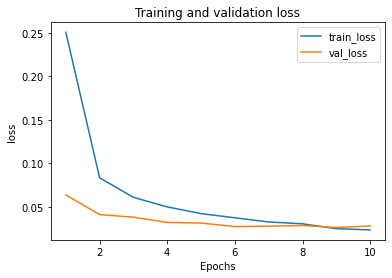

In [47]:
plot_metric(x, 'loss')

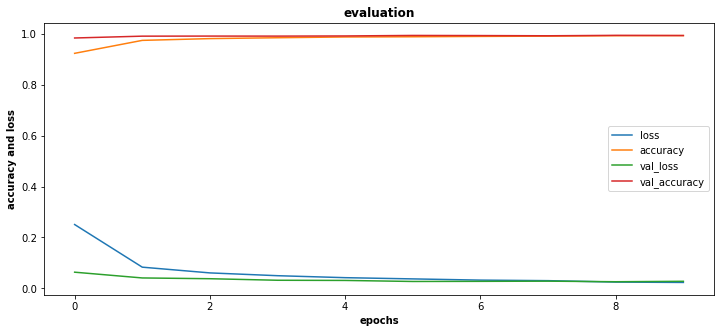

In [48]:
pd.DataFrame(x.history).plot(figsize=(12,5))
plt.title("evaluation",fontweight="bold")
plt.xlabel("epochs",fontweight="bold")
plt.ylabel("accuracy and loss",fontweight="bold")
plt.show()

# ImageDataGenerator

In [49]:
gen =ImageDataGenerator(rotation_range=8,width_shift_range=64)
test_gen=ImageDataGenerator()

In [50]:
train_gen=gen.flow(train_x, train_y,batch_size=64)
test_gen=gen.flow(test_x, test_y,batch_size=64)

In [51]:
from keras.callbacks import EarlyStopping
callsbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]
history=model.fit_generator(train_gen,steps_per_epoch=60000//64,epochs=5,validation_data=test_gen,validation_steps=1000//64)

Epoch 1/5


C:\Users\DELL\AppData\Local\Temp/ipykernel_19912/3546517828.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen,steps_per_epoch=60000//64,epochs=5,validation_data=test_gen,validation_steps=1000//64)


937/937 [==============================] - 68s 72ms/step - loss: 1.8793 - accuracy: 0.2863 - val_loss: 1.7700 - val_accuracy: 0.3083
Epoch 2/5
937/937 [==============================] - 71s 75ms/step - loss: 1.7669 - accuracy: 0.3241 - val_loss: 1.7278 - val_accuracy: 0.3458
Epoch 3/5
937/937 [==============================] - 68s 72ms/step - loss: 1.7410 - accuracy: 0.3319 - val_loss: 1.7186 - val_accuracy: 0.3479
Epoch 4/5
937/937 [==============================] - 72s 77ms/step - loss: 1.7266 - accuracy: 0.3383 - val_loss: 1.7121 - val_accuracy: 0.3333
Epoch 5/5
937/937 [==============================] - 73s 78ms/step - loss: 1.7150 - accuracy: 0.3416 - val_loss: 1.7448 - val_accuracy: 0.3292


In [52]:
gen =ImageDataGenerator(rotation_range=8,width_shift_range=64)
test_gen=ImageDataGenerator()

In [53]:
#imagegenertor

def plot_metric(x, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

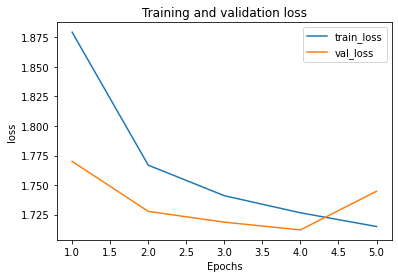

In [54]:
plot_metric(history, 'loss')

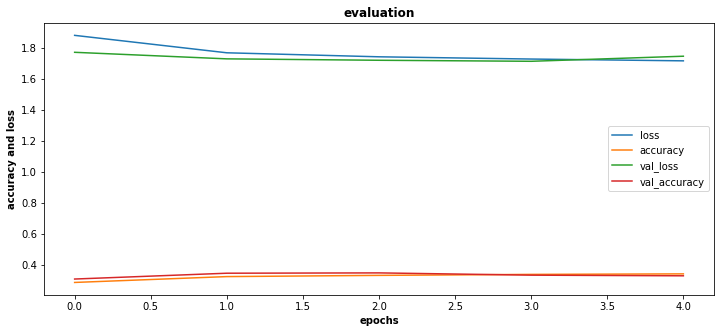

In [55]:

pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title("evaluation",fontweight="bold")
plt.xlabel("epochs",fontweight="bold")
plt.ylabel("accuracy and loss",fontweight="bold")
plt.show()

In [56]:
y_pred = model.predict(test_gen)

ValueError: Failed to find data adapter that can handle input: <class 'keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>

In [ ]:
confusion =confusion_matrix(test_y, np.argmax(y_pred,axis=1))


In [ ]:
sns.heatmap(confusion, annot=True, fmt="d", cbar=False, xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])


In [ ]:
print(confusion)

In [ ]:
c =classification_report(test_y, np.argmax(y_pred,axis=1))

In [ ]:
print(c)

In [ ]:
loss, accuracy= model.evaluate(test_gen, verbose = 0)

print(f'Accuracy: {accuracy*100}')

# fashion mnist dataset

In [2]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax
import keras

from tensorflow.keras import r

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
import seaborn as sns 

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

# fashion minst data set

In [3]:
#loading the MNIST Dataset 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Visualization and Preprocessing

In [7]:
X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

X_test = X_test .reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [8]:
#printing the shapes 

print(X_train.shape,y_train.shape)

print(X_test.shape ,y_test.shape)

 

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [9]:
#normalizing the pixel values of images 

X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

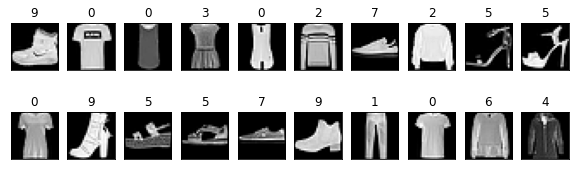

In [10]:
#plotting images of dataset 

fig = plt.figure(figsize = (10,3))

for i in range(20):

    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(X_train[i]), cmap='gray')

    ax.set_title(y_train[i])

In [11]:
shape = X_train.shape[1:]

shape

(28, 28, 1)

# CNN Model

In [12]:
# 
model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [13]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [14]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history=model.fit(X_train,y_train, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 46s - loss: 0.5909 - accuracy: 0.7857 - val_loss: 0.3967 - val_accuracy: 0.8500 - 46s/epoch - 109ms/step
Epoch 2/10
422/422 - 43s - loss: 0.4069 - accuracy: 0.8510 - val_loss: 0.3504 - val_accuracy: 0.8685 - 43s/epoch - 101ms/step
Epoch 3/10
422/422 - 43s - loss: 0.3519 - accuracy: 0.8707 - val_loss: 0.3040 - val_accuracy: 0.8853 - 43s/epoch - 102ms/step
Epoch 4/10
422/422 - 40s - loss: 0.3235 - accuracy: 0.8795 - val_loss: 0.2870 - val_accuracy: 0.8965 - 40s/epoch - 95ms/step
Epoch 5/10
422/422 - 41s - loss: 0.2976 - accuracy: 0.8893 - val_loss: 0.2784 - val_accuracy: 0.8973 - 41s/epoch - 97ms/step
Epoch 6/10
422/422 - 43s - loss: 0.2790 - accuracy: 0.8952 - val_loss: 0.2609 - val_accuracy: 0.9037 - 43s/epoch - 101ms/step
Epoch 7/10
422/422 - 50s - loss: 0.2673 - accuracy: 0.9004 - val_loss: 0.2664 - val_accuracy: 0.9003 - 50s/epoch - 119ms/step
Epoch 8/10
422/422 - 50s - loss: 0.2518 - accuracy: 0.9052 - val_loss: 0.2469 - val_accuracy: 0.9093 - 50s/epoch - 118ms

# EarlyStopping

In [ ]:
from keras.callbacks import EarlyStopping
callsbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]
history2= model.fit(X_train,y_train,epochs=5,batch_size=2,validation_split=0)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


# confusion matrix

In [17]:
 
confusion2=confusion_matrix(y_test, np.argmax(y_pred,axis=1))


In [18]:
print(confusion2)

[[851   0  17  10   6   1 104   0  11   0]
 [  1 983   0   8   2   0   4   0   2   0]
 [ 15   0 833   6  79   0  65   0   2   0]
 [ 10   5   7 903  43   0  29   0   3   0]
 [  0   0  20  12 931   0  36   0   1   0]
 [  0   0   0   0   0 983   0   9   0   8]
 [ 94   0  61  23 123   0 684   0  15   0]
 [  0   0   0   0   0  13   0 967   0  20]
 [  0   1   2   2   6   1   2   4 982   0]
 [  0   0   0   0   0   5   0  40   1 954]]


<AxesSubplot:>

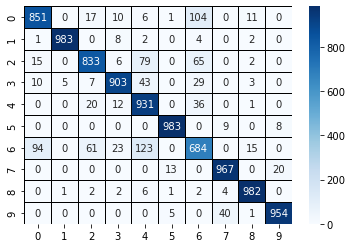

In [19]:
sns.heatmap(confusion2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# classification report

In [20]:
c =classification_report(y_test, np.argmax(y_pred,axis=1))

In [21]:
print(c)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.78      0.93      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [22]:
loss, accuracy= model.evaluate(X_test,y_test, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 90.71000218391418


# traing and loss graph

In [23]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

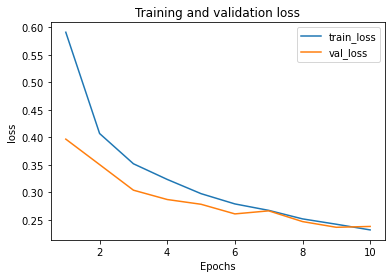

In [24]:
plot_metric(history,"loss")

# Evalutation

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title("evaluation",fontweight="bold")
plt.xlabel("epochs",fontweight="bold")
plt.ylabel("accuracy and loss",fontweight="bold")
plt.show()

# Assisgment-16

# American Sign Language

Image Classification on American Sign Language
The original MNIST(Modified National Institute of Standards and Technology) image dataset of handwritten digits is a popular benchmark for image-based machine learning methods. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0–25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
#Loading traning data into dataframe
df_traindata =pd.read_csv("sign_mnist_train.csv")

In [26]:
#Loading testing data into dataframe
df_testdata =pd.read_csv("sign_mnist_test.csv")

# 2. Familiarizing with Data

In this step, few dataframe methods are used to look into the data and its features.



In [27]:
#checking first 5 instances of dataframe

df_traindata .head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [28]:
#Shape of dataframe
df_traindata.shape

(27455, 785)

In [29]:
#checking the data for null or missing values
df_traindata.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [30]:
# checking info of dataframe

df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [31]:
# checking unique value in dataset

labels =df_traindata['label'].values

unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [32]:
# describtion of dataset

df_traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


<AxesSubplot:ylabel='count'>

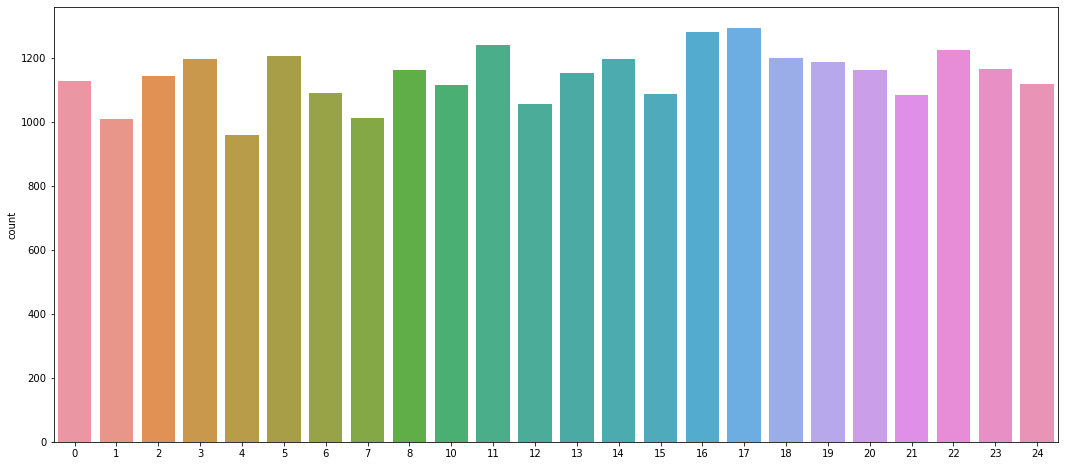

In [33]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [34]:
train_label=df_traindata['label']         # contains set of all label values in order
train_label.head()


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [35]:
 #contains set of all pixel values in order
train=df_traindata.drop(['label'],axis=1)
train.head()  

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [36]:
x_train = train.values.reshape(-1,28,28,1)
print(x_train.shape)

(27455, 28, 28, 1)


Now, we must perform the same data preprocessing steps for the test dataset

In [37]:
test_label=df_testdata['label']
x_test=df_testdata.drop(['label'],axis=1)

print(x_test.shape)
x_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [38]:
x_test=x_test.values.reshape(-1,28,28,1)

# Normaliziation

In [39]:
x_train = x_train / 255        
x_test = x_test / 255

Converting the integer labels (0-24) to binary format
The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0]. The LabelBinarizer package from sklearn.preprocessing is used for that.

In [40]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [41]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


 Preview of first 10 Training Images after Normalization and Reshaping¶

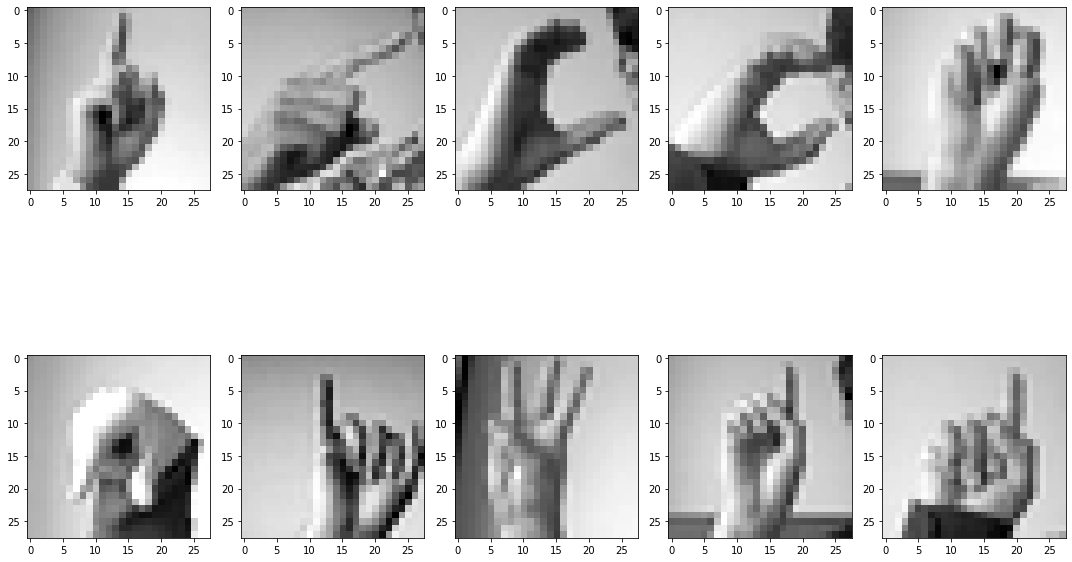

In [43]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(15, 15)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

Preview of first 10 Testing Images after Normalization and Reshaping

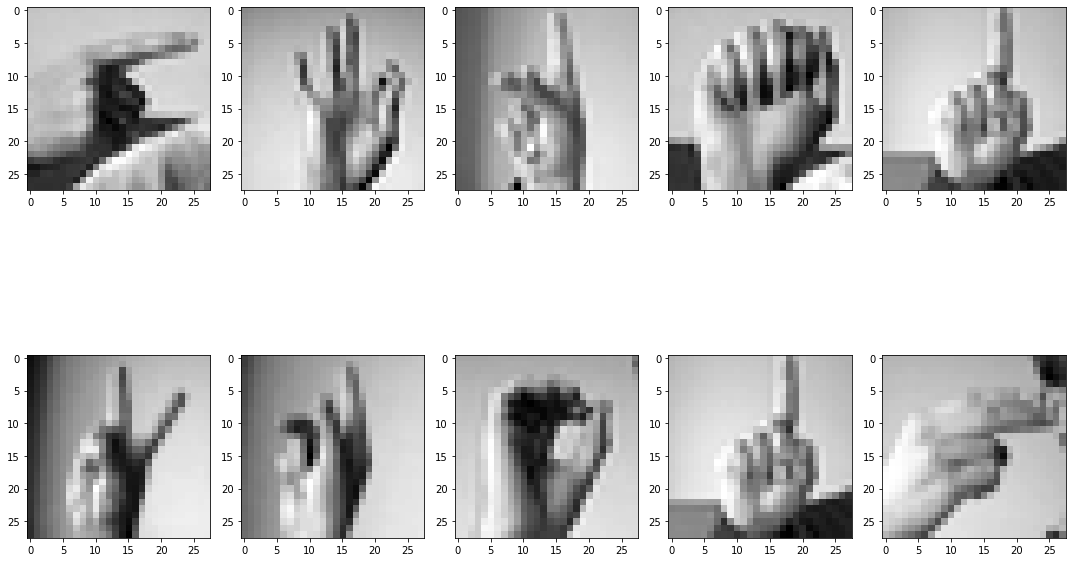

In [45]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(15, 15)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_test[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

# CNN

In [56]:
datagen = ImageDataGenerator(
        featurewise_center=False,                 # set input mean to 0 over the dataset
        samplewise_center=False,                  # set each sample mean to 0
        featurewise_std_normalization=False,      # divide inputs by std of the dataset
        samplewise_std_normalization=False,       # divide each input by its std
        zca_whitening=False,                      # apply ZCA whitening
        rotation_range=10,                        # randomly rotate images in the range (degrees, 0 to 180) - 1
        zoom_range = 0.1,                         # Randomly zoom image - 2
        width_shift_range=0.1,                    # randomly shift images horizontally (fraction of total width) - 3
        height_shift_range=0.1,                   # randomly shift images vertically (fraction of total height) - 4
        horizontal_flip=False,                    # randomly flip images -5
        vertical_flip=False)                      # randomly flip images - 6


datagen.fit(x_train)

In [57]:
# Reducing learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [58]:
# Model Creation

model = Sequential()

# convolution layer

# block 1
model.add(Conv2D(filters=32, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# block 2
model.add(Conv2D(filters=128, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# block 3
model.add(Conv2D(filters=256, kernel_size=(3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# fully connected layer

# flatten layer
model.add(Flatten())
# dense layer 
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.5))
# final layer
model.add(Dense(units = 24 , activation = 'softmax'))

# compile model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                      

In [59]:

# Training the model
history = model.fit(datagen.flow(x_train,y_train, batch_size = 17) ,epochs = 20, 
                    validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
1615/1615 [==============================] - 138s 85ms/step - loss: 1.0104 - accuracy: 0.6885 - val_loss: 0.3758 - val_accuracy: 0.8811 - lr: 0.0010
Epoch 2/20
1615/1615 [==============================] - 155s 96ms/step - loss: 0.1906 - accuracy: 0.9429 - val_loss: 0.2547 - val_accuracy: 0.9366 - lr: 0.0010
Epoch 3/20
1615/1615 [==============================] - 153s 95ms/step - loss: 0.1212 - accuracy: 0.9662 - val_loss: 2.8603 - val_accuracy: 0.3829 - lr: 0.0010
Epoch 4/20
1615/1615 [==============================] - 217s 134ms/step - loss: 0.1089 - accuracy: 0.9713 - val_loss: 0.0731 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 5/20
1615/1615 [==============================] - 30127s 19s/step - loss: 0.0959 - accuracy: 0.9757 - val_loss: 14.3315 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 6/20
1615/1615 [==============================] - 131s 81ms/step - loss: 0.0906 - accuracy: 0.9785 - val_loss: 0.0097 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 7/20
1615/1615 [===============

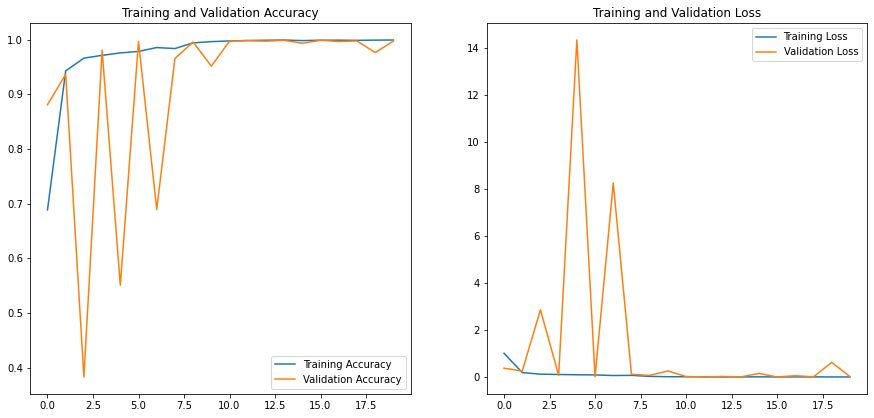

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [63]:
predictions =  np.argmax(model.predict(x_test),axis = 1) 
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
for i in predictions[:5]:
    print(chr(i+65))

225/225 [==============================] - 7s 29ms/step
G
F
K
A
D


In [64]:
print("Classification Report:-")

classes = ["Class " + chr(i+65) for i in range(25) if i != 9 ]
print(classification_report(test_label, predictions, target_names = classes))

Classification Report:-
              precision    recall  f1-score   support

     Class A       1.00      1.00      1.00       331
     Class B       1.00      1.00      1.00       432
     Class C       1.00      1.00      1.00       310
     Class D       1.00      1.00      1.00       245
     Class E       0.96      1.00      0.98       498
     Class F       1.00      1.00      1.00       247
     Class G       1.00      0.95      0.97       348
     Class H       1.00      1.00      1.00       436
     Class I       1.00      1.00      1.00       288
     Class K       1.00      1.00      1.00       331
     Class L       1.00      1.00      1.00       209
     Class M       1.00      1.00      1.00       394
     Class N       1.00      1.00      1.00       291
     Class O       1.00      1.00      1.00       246
     Class P       1.00      1.00      1.00       347
     Class Q       1.00      1.00      1.00       164
     Class R       1.00      1.00      1.00       144
   

Confusion Matrix:-


<AxesSubplot:>

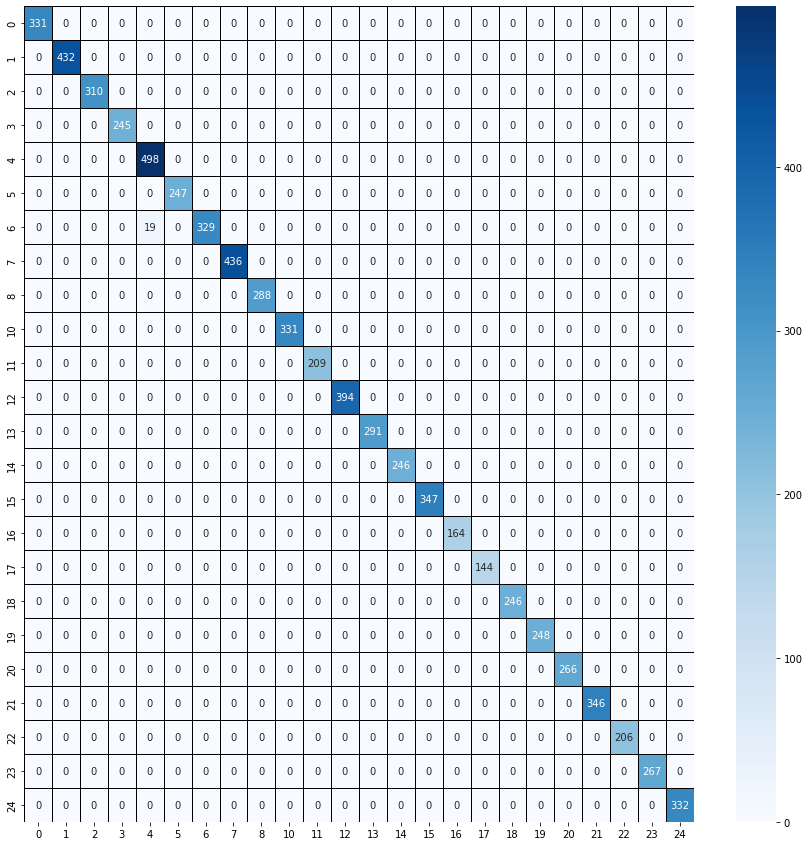

In [65]:
print("Confusion Matrix:-")

cm = confusion_matrix(test_label,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

Predictions Sample


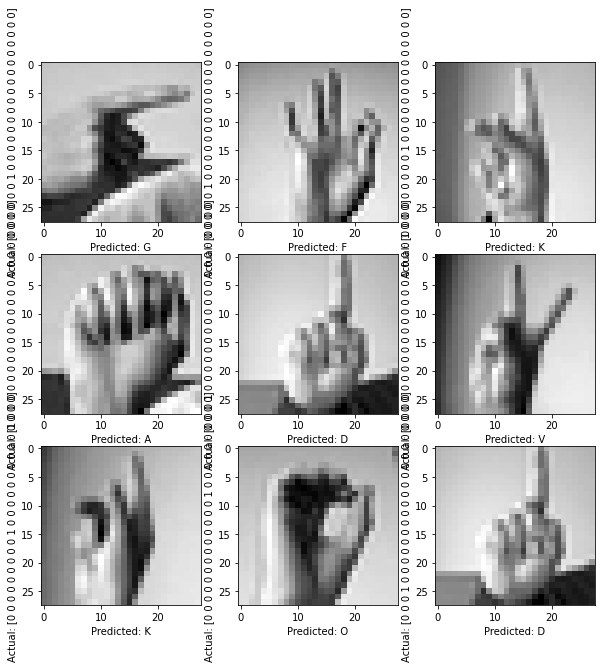

In [71]:
print("Predictions Sample")

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28) ,cmap='gray')
    plt.ylabel(f"Actual: {y_test[i]}")
    plt.xlabel(f"Predicted: {chr(predictions[i]+65)}")
    
plt.show()